In [ ]:
import pandas as pd
import numpy as np

# Load dataset
air = pd.read_csv("air_quality_2024.csv")

# 1. Convert timestamp to datetime
air['timestamp'] = pd.to_datetime(air['timestamp'])

# 2. Sort by timestamp
air = air.sort_values('timestamp')

# 3. Remove duplicate timestamps
air = air.drop_duplicates(subset=['timestamp'])

# 4. Handle missing values
# Check missing values
print("Missing values:\n", air.isnull().sum())

# Option 1: Forward fill (best for time series)
air[['PM25','PM10','NO2']] = air[['PM25','PM10','NO2']].fillna(method='ffill')

# Option 2 (fallback): Replace remaining with mean
air[['PM25','PM10','NO2']] = air[['PM25','PM10','NO2']].fillna(air.mean())

# 5. Handle outliers
# Realistic pollution range for London
air = air[
    (air['PM25'] >= 0) & (air['PM25'] <= 150) &
    (air['PM10'] >= 0) & (air['PM10'] <= 200) &
    (air['NO2'] >= 0) & (air['NO2'] <= 300)
]


# 6. Feature engineering
air['hour'] = air['timestamp'].dt.hour
air['day'] = air['timestamp'].dt.day
air['month'] = air['timestamp'].dt.month
air['weekday'] = air['timestamp'].dt.day_name()

# 7. Save cleaned dataset
air.to_csv("clean_air_quality_2024.csv", index=False)

print("Cleaning completed. File saved as clean_air_quality_2024.csv")


Missing values:
 timestamp    0
PM25         0
PM10         0
NO2          0
dtype: int64
Cleaning completed. File saved as clean_air_quality_2024.csv


/tmp/ipython-input-3368473021.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air[['PM25','PM10','NO2']] = air[['PM25','PM10','NO2']].fillna(method='ffill')


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
traffic = pd.read_csv("traffic_2024.csv")

# 1. Convert timestamp to datetime
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])

# 2. Sort by timestamp
traffic = traffic.sort_values('timestamp')

# 3. Remove duplicate timestamps
traffic = traffic.drop_duplicates(subset=['timestamp'])

# 4. Handle missing values
print("Missing values:\n", traffic.isnull().sum())

# Fill missing traffic_count values
traffic['traffic_count'] = traffic['traffic_count'].fillna(method='ffill')
traffic['traffic_count'] = traffic['traffic_count'].fillna(traffic['traffic_count'].mean())

# 5. Handle outliers
# London average: 200–2000 vehicles per hour
traffic = traffic[(traffic['traffic_count'] >= 0) & (traffic['traffic_count'] <= 5000)]

# If any extreme values remain: cap them
traffic['traffic_count'] = traffic['traffic_count'].clip(lower=0, upper=4000)

# 6. Feature engineering
traffic['hour'] = traffic['timestamp'].dt.hour
traffic['day'] = traffic['timestamp'].dt.day
traffic['month'] = traffic['timestamp'].dt.month
traffic['weekday'] = traffic['timestamp'].dt.day_name()

# 7. Save cleaned dataset
traffic.to_csv("clean_traffic_2024.csv", index=False)

print("Traffic data cleaning completed. File saved as clean_traffic_2024.csv")


Missing values:
 timestamp        0
traffic_count    0
dtype: int64
Traffic data cleaning completed. File saved as clean_traffic_2024.csv


/tmp/ipython-input-3033749493.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic['traffic_count'] = traffic['traffic_count'].fillna(method='ffill')


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
weather = pd.read_csv("weather_2024.csv")

# 1. Convert timestamp
weather['timestamp'] = pd.to_datetime(weather['timestamp'])

# 2. Sort by timestamp
weather = weather.sort_values('timestamp')

# 3. Remove duplicate timestamps
weather = weather.drop_duplicates(subset=['timestamp'])

# 4. Check missing values
print("Missing values:\n", weather.isnull().sum())

# Fill missing values using forward fill
weather[['temperature', 'humidity', 'wind_speed']] = \
    weather[['temperature', 'humidity', 'wind_speed']].fillna(method='ffill')

# Fill any remaining missing values with mean
weather[['temperature', 'humidity', 'wind_speed']] = \
    weather[['temperature', 'humidity', 'wind_speed']].fillna(weather.mean())

# 5. Handle outliers
# Realistic weather ranges for London
weather = weather[
    (weather['temperature'] >= -5) & (weather['temperature'] <= 40) &
    (weather['humidity'] >= 10) & (weather['humidity'] <= 100) &
    (weather['wind_speed'] >= 0) & (weather['wind_speed'] <= 30)
]

# Clip extreme values if any remain
weather['temperature'] = weather['temperature'].clip(-5, 40)
weather['humidity'] = weather['humidity'].clip(10, 100)
weather['wind_speed'] = weather['wind_speed'].clip(0, 25)

# 6. Feature engineering
weather['hour'] = weather['timestamp'].dt.hour
weather['day'] = weather['timestamp'].dt.day
weather['month'] = weather['timestamp'].dt.month
weather['weekday'] = weather['timestamp'].dt.day_name()

# 7. Save cleaned dataset
weather.to_csv("clean_weather_2024.csv", index=False)

print("Weather data cleaning completed. File saved as clean_weather_2024.csv")


Missing values:
 timestamp      0
temperature    0
humidity       0
wind_speed     0
dtype: int64
Weather data cleaning completed. File saved as clean_weather_2024.csv


/tmp/ipython-input-19034209.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather[['temperature', 'humidity', 'wind_speed']].fillna(method='ffill')


In [ ]:
import pandas as pd

# Load cleaned datasets
air = pd.read_csv("clean_air_quality_2024.csv")
traffic = pd.read_csv("clean_traffic_2024.csv")
weather = pd.read_csv("clean_weather_2024.csv")

# Convert timestamp to datetime format in all datasets
air['timestamp'] = pd.to_datetime(air['timestamp'])
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])
weather['timestamp'] = pd.to_datetime(weather['timestamp'])

# 1. Merge Air + Traffic
merged = pd.merge(air, traffic, on="timestamp", how="inner")

# 2. Merge with Weather
merged = pd.merge(merged, weather, on="timestamp", how="inner")

# 3. Sort by time
merged = merged.sort_values("timestamp")

# 4. Remove duplicates (if any)
merged = merged.drop_duplicates(subset=["timestamp"])

# 5. Final merged dataset saved
merged.to_csv("merged_london_dataset_2024.csv", index=False)

print("Merging complete! File saved as merged_london_dataset_2024.csv")
print("Shape of merged dataset:", merged.shape)


Merging complete! File saved as merged_london_dataset_2024.csv
Shape of merged dataset: (8784, 20)



--- DATA INFO ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8784 non-null   datetime64[ns]
 1   PM25           8784 non-null   float64       
 2   PM10           8784 non-null   float64       
 3   NO2            8784 non-null   float64       
 4   hour_x         8784 non-null   int64         
 5   day_x          8784 non-null   int64         
 6   month_x        8784 non-null   int64         
 7   weekday_x      8784 non-null   object        
 8   traffic_count  8784 non-null   int64         
 9   hour_y         8784 non-null   int64         
 10  day_y          8784 non-null   int64         
 11  month_y        8784 non-null   int64         
 12  weekday_y      8784 non-null   object        
 13  temperature    8784 non-null   float64       
 14  humidity       8784 non-null   float64       
 15  w

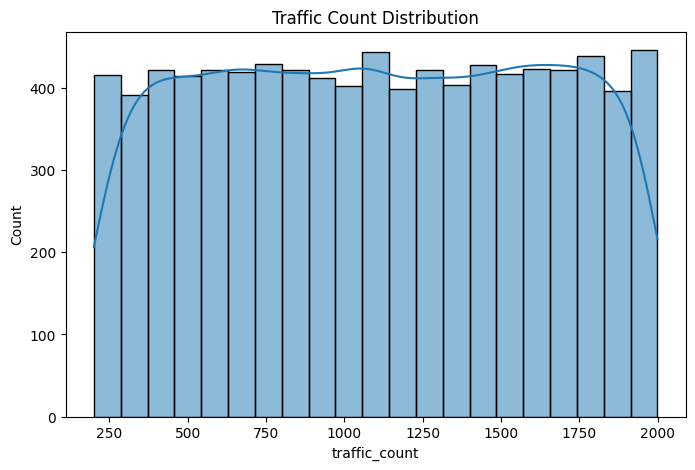

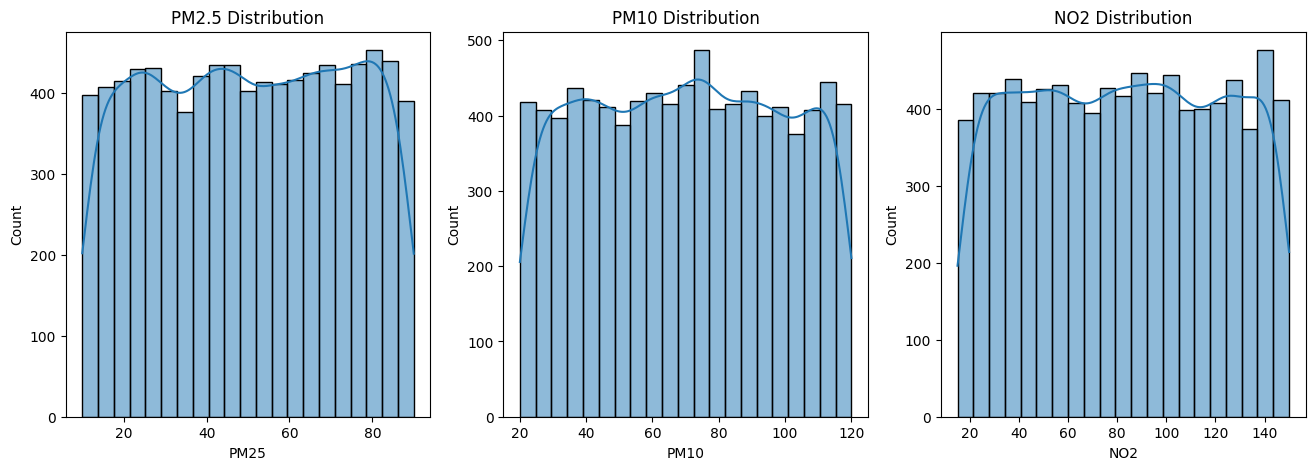

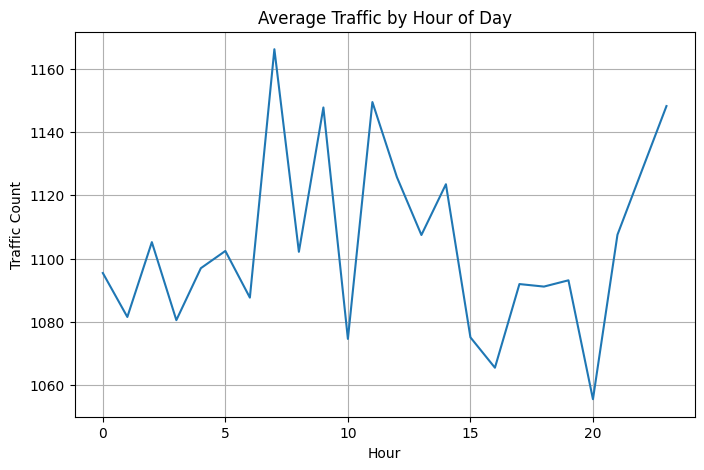

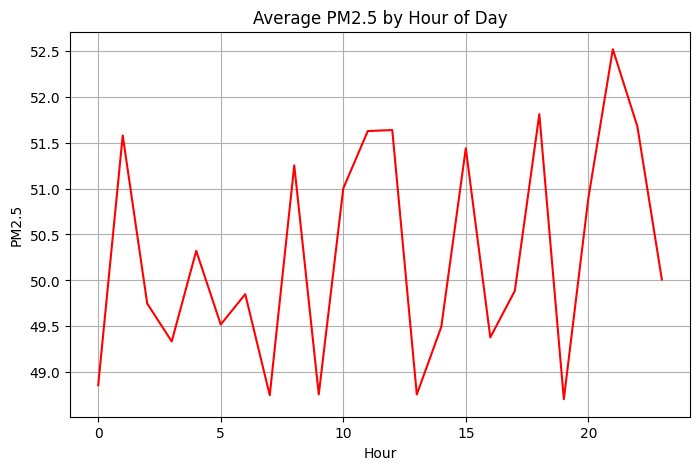

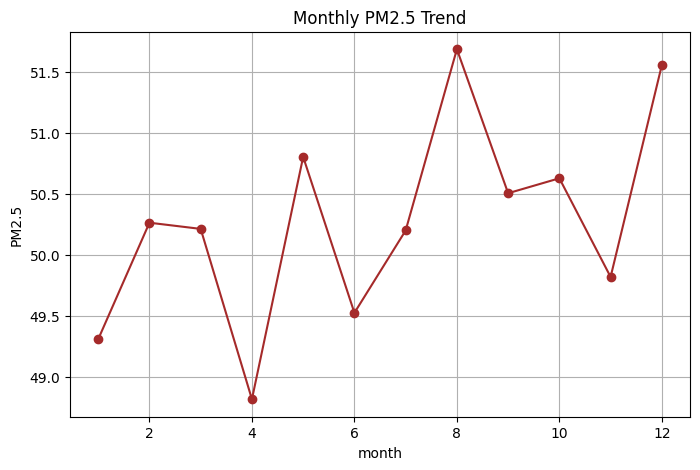

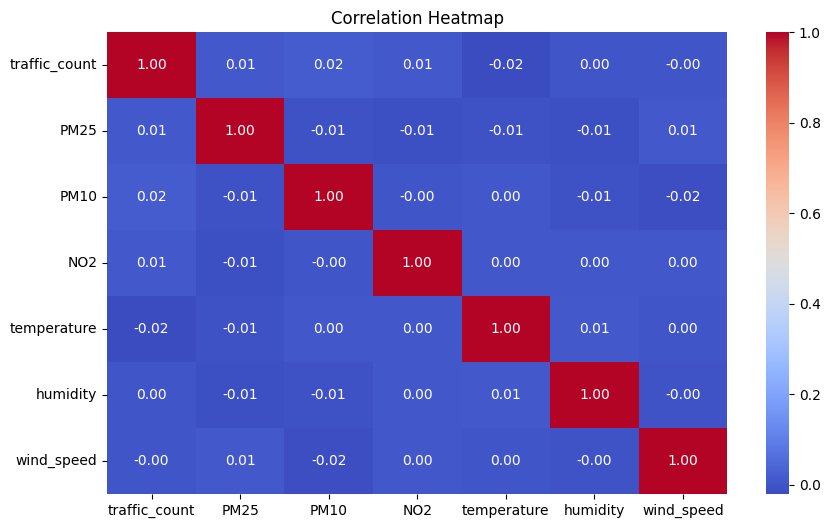

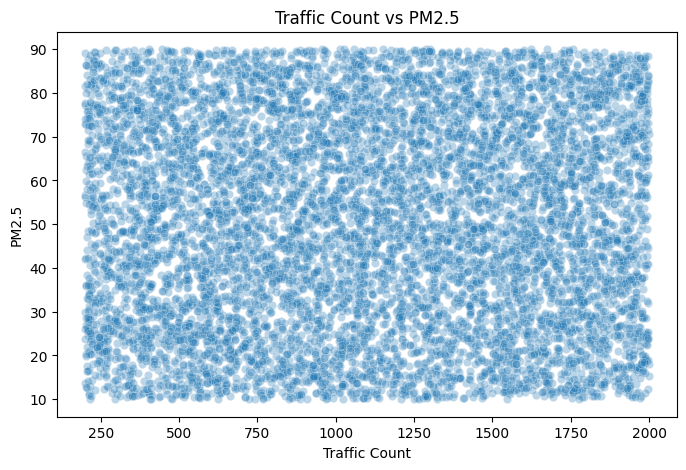

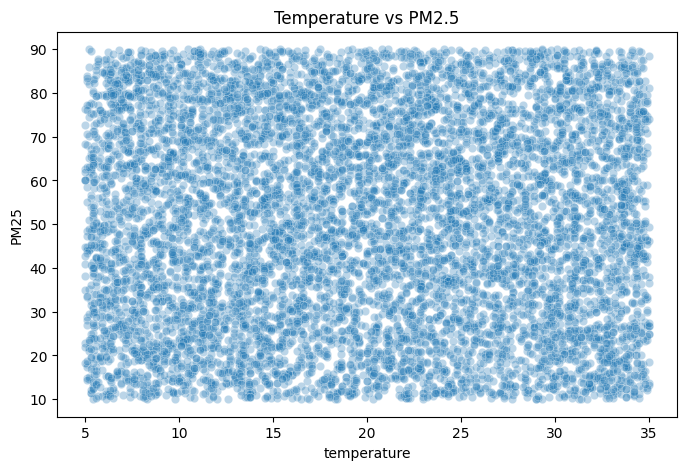

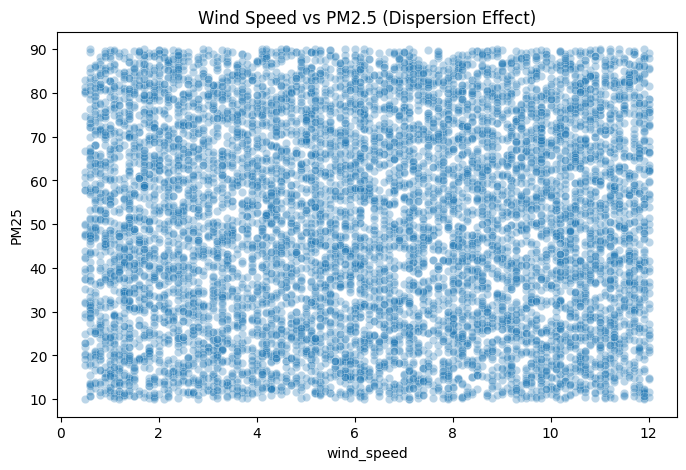


 EDA Completed Successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged data
df = pd.read_csv("merged_london_dataset_2024.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Basic Overview
print("\n--- DATA INFO ---\n")
print(df.info())

print("\n--- BASIC STATS ---\n")
print(df.describe())

print("\n--- MISSING VALUES ---\n")
print(df.isnull().sum())

# 2. Traffic Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['traffic_count'], kde=True)
plt.title("Traffic Count Distribution")
plt.show()

# 3. Pollution Distribution
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(df['PM25'], kde=True, ax=axes[0]); axes[0].set_title("PM2.5 Distribution")
sns.histplot(df['PM10'], kde=True, ax=axes[1]); axes[1].set_title("PM10 Distribution")
sns.histplot(df['NO2'], kde=True, ax=axes[2]); axes[2].set_title("NO2 Distribution")
plt.show()

# 4. Time Trends (Hourly)
df['hour'] = df['timestamp'].dt.hour

plt.figure(figsize=(8,5))
df.groupby('hour')['traffic_count'].mean().plot()
plt.title("Average Traffic by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Traffic Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
df.groupby('hour')['PM25'].mean().plot(color="red")
plt.title("Average PM2.5 by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

# 5. Monthly Trend
df['month'] = df['timestamp'].dt.month

plt.figure(figsize=(8,5))
df.groupby('month')['PM25'].mean().plot(marker='o', color='brown')
plt.title("Monthly PM2.5 Trend")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['traffic_count','PM25','PM10','NO2','temperature','humidity','wind_speed']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 7. Traffic vs PM2.5 Scatter
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='traffic_count', y='PM25', alpha=0.3)
plt.title("Traffic Count vs PM2.5")
plt.xlabel("Traffic Count")
plt.ylabel("PM2.5")
plt.show()

# 8. Weather Impact on Pollution
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='temperature', y='PM25', alpha=0.3)
plt.title("Temperature vs PM2.5")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='wind_speed', y='PM25', alpha=0.3)
plt.title("Wind Speed vs PM2.5 (Dispersion Effect)")
plt.show()

print("\n EDA Completed Successfully!")


In [ ]:
import pandas as pd

# Load merged dataset
df = pd.read_csv("merged_london_dataset_2024.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(["Saturday","Sunday"]).astype(int)

# 2. Traffic Congestion Level
# Let's use quantiles to categorize
q1 = df['traffic_count'].quantile(0.33)
q2 = df['traffic_count'].quantile(0.66)

def congestion_level(x):
    if x <= q1:
        return "Low"
    elif x <= q2:
        return "Medium"
    else:
        return "High"

df['congestion_level'] = df['traffic_count'].apply(congestion_level)

# 3. Pollution Category (EPA-like)
def pollution_category(pm25):
    if pm25 <= 30:
        return "Good"
    elif pm25 <= 60:
        return "Moderate"
    else:
        return "High"

df['pollution_level'] = df['PM25'].apply(pollution_category)

# 4. Weather Impact Indicators
df['high_wind'] = (df['wind_speed'] > 8).astype(int)
df['high_humidity'] = (df['humidity'] > 80).astype(int)
df['high_temp'] = (df['temperature'] > 25).astype(int)

# 5. Interaction Features
df['traffic_pm25_interaction'] = df['traffic_count'] * df['PM25']
df['traffic_temp_interaction'] = df['traffic_count'] * df['temperature']
df['weather_pollution_interaction'] = df['wind_speed'] * df['PM25']

# 6. Estimated AQI (Simplified Model)
# PM2.5-based AQI approximation
def calculate_aqi(pm25):
    if pm25 <= 30:
        return 50
    elif pm25 <= 60:
        return 100
    elif pm25 <= 90:
        return 150
    else:
        return 200

df['AQI'] = df['PM25'].apply(calculate_aqi)

# 7. Save Final Dataset
df.to_csv("final_london_master_dataset_2024.csv", index=False)

print("Feature Engineering Completed!")
print("Final dataset saved as final_london_master_dataset_2024.csv")


Feature Engineering Completed!
Final dataset saved as final_london_master_dataset_2024.csv
